In [2]:
import h5py as hp
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pickle as pkl

f = hp.File("/Users/cosinga/sims/sparta_output/L0063_N0256_CBol/moria_trees/moria_tree_cbol_l0063_n0256_strd2_v2.hdf5", 'r')


In [27]:
alive = f['mask_alive']
pid_cat = f['parent_id_cat']
pid_orb = f['parent_id_orbinf']
snapz = f['simulation'].attrs['snap_z']

In [28]:
def count_subs(pid):
    mask = pid > 0
    return np.sum(mask, axis = 1)

In [29]:
nhalos = np.sum(alive[:], axis = 1)
nsubs_cat = count_subs(pid_cat[:])
nsubs_orb = count_subs(pid_orb[:])

Text(0.5, 1.0, 'Tracking Number of Subhalos Across Snapshots')

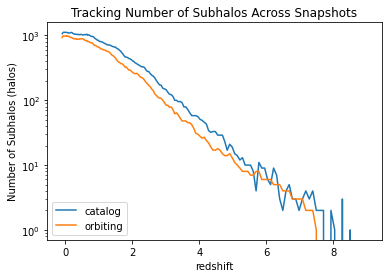

In [30]:
plt.plot(snapz, nsubs_cat, label = 'catalog')
plt.plot(snapz, nsubs_orb, label = 'orbiting')
plt.yscale('log')
plt.ylabel('Number of Subhalos (halos)')
plt.xlabel('redshift')
plt.legend(loc = 'lower left')
plt.title("Tracking Number of Subhalos Across Snapshots")

In [34]:
def find_subs(pid_snap, hostid):
    matches = np.where(hostid == pid_snap)[0]
    return len(matches)

In [39]:
catcounts = np.zeros_like(snapz)
orbcounts = np.zeros_like(snapz)
host_idx = 1
for i in range(len(snapz)):
    hostid = f['id'][i, host_idx]
    if not hostid == 0:
        catcounts[i] = find_subs(pid_cat[i, :], hostid)
        orbcounts[i] = find_subs(pid_orb[i, :], hostid)
    
        

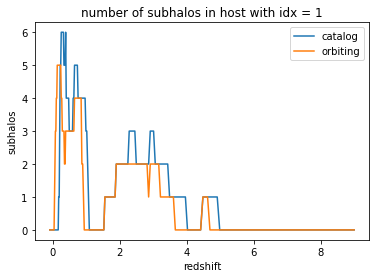

In [45]:
plt.plot(snapz, catcounts, label = 'catalog')
plt.plot(snapz, orbcounts, label = 'orbiting')
plt.title("number of subhalos in host with idx = 1")
plt.xlabel('redshift')
plt.ylabel('subhalos')
plt.legend(loc = 'upper right')